### Advent of Code 2018

Starting on 1 December 2018 and, every day until the 25 December 2018, a new two-part puzzle is available. Providing a correct answer to the first part of the puzzle will give you a gold star. If you complete both parts, you receive... two gold stars. The description for the second part of the puzzle is only shown after solving part one. 

I will not copy here the complete descriptions of the puzzle. Follow the links in each section to understand what is asked in each puzzle.

Let's start with some imports and functions that will be useful in the resolution of the puzzles.

In [1]:
import os
from collections import defaultdict, Counter
from itertools import cycle, product
from datetime import datetime
import re
import string 

#file input
def read_input(day, file_path='input/d{}.txt'):
    with open(file_path.format(day), 'r') as f:
        _input = f.read().splitlines()
        
    return _input

### [Day 1: Chronal Calibration](https://adventofcode.com/2018/day/1)

The input for the first puzzle is a list of integers, one per line, representing the frequency changes. Let's have a look at the first few lines in the input file.

In [2]:
input_d01 = read_input('01')
        
input_d01[:10]

['-8', '-18', '-14', '-10', '-7', '-10', '-16', '+19', '-5', '-7']

##### Part One
> Starting with a frequency of zero, what is the resulting frequency after all of the changes in frequency have been applied?

That's easy! The resulting frequency corresponds to the sum of all the frequency changes

In [3]:
def d01_p1():
    chgs = [int(x) for x in input_d01]
        
    return sum(chgs)

d01_p1()

497

Submiting the output above will earn us our first star. On to part 2

##### Part Two
> What is the first frequency your device reaches twice?

Reading carefully the description we realize that we have to loop multiple times over the input frequency changes. After a quick search I found __[itertools.cycle](https://docs.python.org/3.6/library/itertools.html#itertools.cycle)__. This allow us to make an iterator that repeats indefinitely over the elementos of the input list. In each iteration, the resulting frequency is added to the set if not visited previously. The process stops when a match is found in the set.  

<b>Important:</b> Remember to add the initial frequency (zero) to the set. Otherwise the solution fails for the trivial case: [-1, +1]

In [4]:
def d01_p2():
    chgs = [int(x) for x in input_d01]
    
    f = 0                  #starting frequency
    visited = set([f])     #store the starting frequency
    for c in cycle(chgs): 
        f += c
        if f in visited:
            return f
        else:
            visited.add(f)

d01_p2()

558

That's our second star. The first puzzle and first day are completed.

### [Day 2: Inventory Management System](https://adventofcode.com/2018/day/2)

Today the input is a list of box IDs

In [5]:
input_d02 = read_input('02')
        
input_d02[:10]

['bazvmqthjtrnlosiecxyghkwud',
 'pazvmqbijirzlosiecxyghkwud',
 'pazvtqbmjtrnlosiecxyghkwzd',
 'pazvmqbfjtrjlosnlcxyghkwud',
 'pazvkqbfjtrtlosiecjyghkwud',
 'paztmqbfjtrnbosiecxyglkwud',
 'pazvmqbfjtunlosievxmghkwud',
 'pazvmqbfjtmngosiecyyghkwud',
 'jazvmqbfjtrnlosiecxygikpud',
 'pazvqqbfctrnlosimcxyghkwud']

##### Part One

Our objective is to identify the number of box IDs that contain a letter which appears exactly twice and those that have a letter that appears exactly three times. Multiplying these two numbers produces a "checksum" which is the answer to our puzzle.

> What is the checksumfor your list of box IDs?

In [6]:
def d02_p1():   
    has_two = 0
    has_three = 0

    for i in input_d02:
        c = Counter(i)
        if len([k for k,v in c.items() if v == 2]) > 0:
            has_two += 1
        if len([k for k,v in c.items() if v == 3]) > 0:
            has_three += 1
            
    return has_two * has_three

d02_p1()


8296

#### Part Two

The boxes full of prototype fabric will have IDs which differ by exactly one character at the same position in both strings

> What letters are common between the two correct box IDs?

Let's start by identifying the boxes that differ by exactly one letter at the same position.

In [7]:
def d02_p2():    
    for box_id1 in input_d02:
        for box_id2 in input_d02:
            if len([i for i in range(len(box_id1)) if box_id1[i] != box_id2[i]]) == 1:
                print('Candidate boxes: {} and {}'.format(box_id1, box_id2))
                return (box_id1, box_id2)
            
(box_id1, box_id2) = d02_p2()                

Candidate boxes: pazvmqbfjtrbeosiecxlghkwud and pazvmqbfotrbeosiecxlghkwud


We found our candidate boxes, we need just to find the letters that are common to both boxes - this is as simple as removing the differing character from either of the boxes.

In [8]:
ans = []
for i in range(len(box_id1)):
    if box_id1[i] == box_id2[i]:
        ans.append(box_id1[i])
        
"".join(ans)

'pazvmqbftrbeosiecxlghkwud'

That's our second star. The second puzzle and second day are completed.

### [Day 3: No Matter How You Slice It](https://adventofcode.com/2018/day/3)

Today's input is a list of claims.

Each Elf has made a claim about which area of fabric would be ideal for Santa's suit. All claims have an ID and consist of a single rectangle with edges parallel to the edges of the fabric. Each claim's rectangle is defined as follows:

    The number of inches between the left edge of the fabric and the left edge of the rectangle.
    The number of inches between the top edge of the fabric and the top edge of the rectangle.
    The width of the rectangle in inches.
    The height of the rectangle in inches.
    
#### Part One    
    
> How many square inches of fabric are within two or more claims?    


In [9]:
input_d03 = read_input('03')
        
input_d03[:10]

['#1 @ 151,671: 11x15',
 '#2 @ 887,913: 28x22',
 '#3 @ 808,917: 17x11',
 '#4 @ 727,230: 26x26',
 '#5 @ 638,853: 21x20',
 '#6 @ 713,106: 17x18',
 '#7 @ 745,709: 18x15',
 '#8 @ 550,92: 29x19',
 '#9 @ 389,659: 26x24',
 '#10 @ 501,813: 27x29']

Let's first start by parsing the input file. Each line represents a claim with format: 

> \#claimID @ x,y: wxh

We could do this using the function [split()](https://docs.python.org/3/library/stdtypes.html#str.split) to partition the line into words and extract the claim details, or using the fact that all the claim attributes are integers, we can create a simple regex to match an integer and [findall()](https://docs.python.org/3/library/re.html#re.findall) to return all the instances of these in the input.

In [10]:
re.findall(r'\d+', input_d03[0])

['1', '151', '671', '11', '15']

Let's lay all the claims on the fabric for Santa's suit

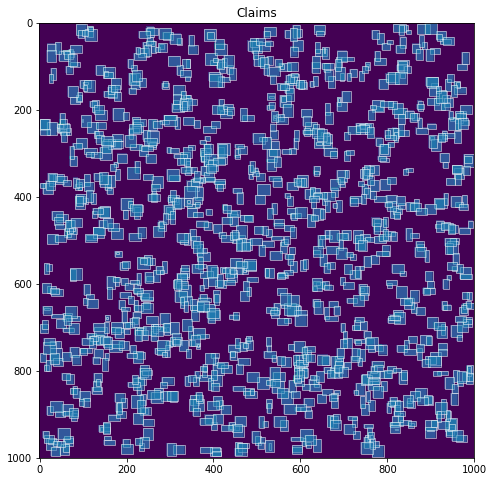

In [11]:
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib.collections import PatchCollection
from matplotlib.patches import Rectangle
from matplotlib import cm

fabric = np.zeros(shape=(1000,1000))

patches = []
fig, ax = plt.subplots(figsize=(8,8))
ax.set_title("Claims")

for claim in input_d03:
    claimID, x, y, w, h = [int(n) for n in re.findall('\d+', claim)]
    fabric[y:y+h,x:x+w] += 1
    
    patches.append(Rectangle((x,y), w,h, label=str(claimID)))
    
pc = PatchCollection(patches, alpha=0.5, facecolor=None, edgecolor="white")
ax.add_collection(pc)

ax.imshow(fabric);

We can use a [dictionary](https://docs.python.org/3/library/collections.html#collections.defaultdict) to store all the claimed squares and the number of times each was claimed. The answer to part one of the puzzle corresponds to the number of keys in the dictionary that have a value greater than one.

In [12]:
def d03_p1():
    claimed_squares = defaultdict(int)
    for claim in input_d03:
        claim_id, x, y, w, h = [int(n) for n in re.findall('\d+', claim)]
        for xy in product(range(x, x+w), range(y, y+h)):
            claimed_squares[xy] += 1
    return sum(1 for v in claimed_squares.values() if v > 1)

d03_p1()

124850

#### Part Two
> What is the ID of the only claim that doesn't overlap?

A claim will not overlap with any other claim if all its squares have value one in the claimedSquares dictionary.

In [13]:
def d03_p2():
    claimed_squares = defaultdict(int)
    #store claims
    for claim in input_d03:
        claim_id, x, y, w, h = [int(n) for n in re.findall('\d+', claim)]
        for xy in product(range(x, x+w), range(y, y+h)):
            claimed_squares[xy] += 1
            
    #find the claim with squares not claimed by any other Elf
    for claim in input_d03:
        claim_id, x, y, w, h = [int(n) for n in re.findall('\d+', claim)]
        if all(claimed_squares[xy] == 1 for xy in product(range(x, x+w), range(y, y+h))):
            return claim_id
        
d03_p2()

1097

And that's the third day completed!

### [Day 4: Repose Record](https://adventofcode.com/2018/day/4)

For day four we are given a log containing the ID of the guard on duty on a given night as well as when they fall asleep or wake up while at their post. 

#### Part One

>Find the guard that has the most minutes asleep. What minute does that guard spend asleep the most?  
>What is the ID of the guard you chose multiplied by the minute you chose?

As usual, let's start by having a look at the format of our puzzle input.

In [14]:
input_d04 = read_input('04')
        
input_d04[:10]

['[1518-05-24 23:56] Guard #1721 begins shift',
 '[1518-08-22 00:09] falls asleep',
 '[1518-05-19 00:53] wakes up',
 '[1518-04-19 23:48] Guard #773 begins shift',
 '[1518-09-24 00:35] wakes up',
 '[1518-07-15 00:56] wakes up',
 '[1518-08-10 00:03] Guard #769 begins shift',
 '[1518-07-10 00:50] wakes up',
 '[1518-07-12 00:54] falls asleep',
 '[1518-05-30 00:51] wakes up']

As all asleep/awake times are during the midnight hour (00:00 - 00:59), only the minute portion (00 - 59) is relevant for those events. We can store the guards sleep patterns in a dictionary of lists (of integers), where each list has 60 elements.

In [15]:
def sleep_pattern():
    sleep = defaultdict(lambda:[0 for x in range(60)]) # sleepTimes[guard] = [1, 0, 0, 1...]
    #sleep = defaultdict(lambda: defaultdict(int))
    #Compute the sleep times for all the guards
    for event in sorted(input_d04):
        time, action = event[1:].split("] ")
        date = datetime.strptime(time, '%Y-%m-%d %H:%M')

        if "Guard" in action:
            guard = int(re.findall("[\d]+", action)[0])
        elif "asleep" in action:
            start = date.minute
        elif "wakes" in action:
            end = date.minute
            for m in range(start, end):
                sleep[guard][m] += 1
    
    return sleep

In [16]:
def d04_p1():
    sleep = sleep_pattern()
    
    guard_most_sleep = max(sleep.keys(), key = (lambda g: sum(sleep[g])))
    minute_most_asleep = sleep[guard_most_sleep].index(max(sleep[guard_most_sleep]))
    
    return guard_most_sleep * minute_most_asleep

d04_p1()

38813

#### Part Two

> Of all guards, which guard is most frequently asleep on the same minute?  
> What is the ID of the guard you chose multiplied by the minute you chose?

In [17]:
def d04_p2():
    sleep = sleep_pattern()
    
    guard_most_sleep_minute = max(sleep.keys(), key=lambda g: max(sleep[g]))
    minute_most_asleep = sleep[guard_most_sleep_minute].index(max(sleep[guard_most_sleep_minute]))

    return guard_most_sleep_minute * minute_most_asleep

d04_p2()


141071

### [Day 5: Alchemical Reduction](https://adventofcode.com/2018/day/5)

In day five we analyse the chemical composition of santa's suit's material. The suit's material is made of a polymer formed by smaller units which, when triggered, react with each other such that two adjacent units of the same type and opposite polarity are destroyed. 

#### Part One

>How many units remain after fully reacting the polymer you scanned?

In [35]:
input_d05 = read_input('05')[0]

input_d05[:80]

'bBkKQqgaAGzyYZCcGgXVvGgxQxtTXwWqJOojHhWwHhAaIZKkzcCCcHhqhHbBnNNnTtFfQzZiGgeEmHhg'

Units' types are represented by letters; units' polarity is represented by capitalization. For instance, r and R are units with the same type but opposite polarity, whereas r and s are entirely different types and do not react. We know that 

    The ASCII codes for a-z are 97-122  
    The ASCII codes for A-Z are 65-90

So, for any given upper case letter, we obtain its corresponding lower case counterparty by adding 32 to its ASCII code. For example, 
>The ASCII code for 'A' = 65 and 65 + 32 = 97 which is the ASCII code for 'a'. 

We can use this information to define a small function that checks if two units react. 

In [75]:
def react(unit1, unit2):
    return abs(ord(unit1)-ord(unit2)) == 32

We can use this function as we iterate over the list to fully react the polymer

In [88]:
def react_polymer(polymer):
    res = []
    res.append(polymer[0])
    
    for p in polymer[1:]:
        if len(res) > 0 and react(p, res[-1]):
            res.pop()
        else:
            res.append(p)
    
    return len(res)

def d05_p1(polymer):   
    return react_polymer(polymer)
    
d05_p1(input_d05)

10598

#### Part Two

> What is the length of the shortest polymer you can produce by removing all units of exactly one type and fully reacting the result?

In [89]:
def d05_p2(polymer):
    units = set([c.lower() for c in polymer])

    return min([react_polymer(polymer.replace(u, '').replace(u.upper(), '')) for u in units])

d05_p2(input_d05)   

5312